# How to use the StoG class from PyStoG

This tutorial shows how to use the `StoG` class from `pystog`


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from tests.materials import Argon
from tests.utils import get_index_of_function
from pystog.utils import ReciprocalSpaceHeaders, RealSpaceHeaders

from pystog import StoG

## Preview of the input data using Argon

To use the `StoG` class, we first need some data. Lets load in some test data for Argon from our test suite. 
We are going to extract the $Q$ and $S(Q)$ along with the $r$ and $g(r)$. 

NOTE: The argon data was created using small molecular dynamics simualtions with [LAMMPS](https://lammps.sandia.gov/). The input files are provided in the PyStoG repository found [here](https://github.com/marshallmcdonnell/pystog/tree/master/data/lammps_inputs).

First, we can preview what is in the reciprocal space data file


In [2]:
cat ../data/test_data/argon.reciprocal_space.dat

1753
# Q S(Q) Q[S(Q)-1] FK(Q) DCS(Q)
0.020000 1.246037 0.004921 0.896560 6.331560
0.040000 0.950247 -0.001990 -0.181299 5.253701
0.060000 0.597944 -0.024123 -1.465094 3.969906
0.080000 0.309589 -0.055233 -2.515859 2.919141
0.100000 0.141515 -0.085849 -3.128320 2.306680
0.120000 0.076439 -0.110827 -3.365456 2.069544
0.140000 0.061231 -0.131428 -3.420874 2.014126
0.160000 0.053666 -0.151414 -3.448443 1.986557
0.180000 0.042403 -0.172368 -3.489485 1.945515
0.200000 0.035150 -0.192970 -3.515914 1.919086
0.220000 0.037215 -0.211813 -3.508387 1.926613
0.240000 0.043336 -0.229599 -3.486085 1.948915
0.260000 0.045411 -0.248193 -3.478522 1.956478
0.280000 0.042056 -0.268224 -3.490748 1.944252
0.300000 0.038309 -0.288507 -3.504403 1.930597
0.320000 0.038133 -0.307797 -3.505044 1.929956
0.340000 0.040084 -0.326371 -3.497934 1.937066
0.360000 0.040509 -0.345417 -3.496386 1.938614
0.380000 0.038710 -0.365290 -3.502939 1.932061
0.400000 0.037270 -0.385092 -3.508190 1.926810
0.420000 0.038059 -0.4040

And also preview what is in the real space data file 

In [3]:
cat ../data/test_data/argon.real_space.dat

1279
# r g(r) G(r) GK(r)
0.075000 0.000000 -0.020150 -3.644000
0.125000 0.000000 -0.033584 -3.644000
0.175000 0.000000 -0.047017 -3.644000
0.225000 0.000000 -0.060451 -3.644000
0.275000 0.000000 -0.073884 -3.644000
0.325000 0.000000 -0.087317 -3.644000
0.375000 0.000000 -0.100751 -3.644000
0.425000 0.000000 -0.114184 -3.644000
0.475000 0.000000 -0.127618 -3.644000
0.525000 0.000000 -0.141051 -3.644000
0.575000 0.000000 -0.154485 -3.644000
0.625000 0.000000 -0.167918 -3.644000
0.675000 0.000000 -0.181352 -3.644000
0.725000 0.000000 -0.194785 -3.644000
0.775000 0.000000 -0.208218 -3.644000
0.825000 0.000000 -0.221652 -3.644000
0.875000 0.000000 -0.235085 -3.644000
0.925000 0.000000 -0.248519 -3.644000
0.975000 0.000000 -0.261952 -3.644000
1.025000 0.000000 -0.275386 -3.644000
1.075000 0.000000 -0.288819 -3.644000
1.125000 0.000000 -0.302253 -3.644000
1.175000 0.000000 -0.315686 -3.644000
1.225000 0.000000 -0.329120 -3.644000
1.275000 0.000000 -0.342553 -3.644000
1.325000 0.000000 -0.3559

## Initialize StoG input

Okay, so we create an instance of the `material` object using the test utility `Argon` class that helps us get the input ready for these datasets.

In [4]:
material = Argon()

Now, we load in the reciprocal space data we previewed, specifically $S(Q)$:

In [5]:
reciprocal_space_filename = "../data/test_data/argon.reciprocal_space.dat"

data = np.loadtxt(reciprocal_space_filename, skiprows=2)
q = data[:, get_index_of_function("Q", ReciprocalSpaceHeaders)]
sq = data[:, get_index_of_function("S(Q)", RealSpaceHeaders)]

And also the real space data we previewed, specifically $g(r)$:

In [6]:
real_space_filename = "../data/test_data/argon.real_space.dat"
                 
data = np.loadtxt(real_space_filename, skiprows=2)
r = data[:, get_index_of_function("r", RealSpaceHeaders)]
gofr = data[:, get_index_of_function("g(r)", RealSpaceHeaders)]

Here, we use the material information along with the loaded $r$ data to make inputs we 
will pass to initialize the `StoG` class for this Argon data.

In [7]:
kwargs_for_stog_input = {
    'NumberDensity': material.kwargs['rho'],
    '<b_coh>^2': material.kwargs['<b_coh>^2'],
    '<b_tot^2>': material.kwargs['<b_tot^2>'],
    'FourierFilter': {'Cutoff': 1.5},
    'OmittedXrangeCorrection': False,
    'Rdelta': r[1] -r[0],
    'Rmin': min(r),
    'Rmax': max(r)
}


And also the information to load in the reciprocal space data. Here we are showing how we 
can load two datasets in order to merge them together. One dataset will be for the 0->15.0 $Q$-space data
and the other will be from 1.9->35. Thus we will have overlap in the 1.9->15.0 $Q$-space range:

In [8]:
kwargs_for_files = {
    'Files': [
        {'Filename': reciprocal_space_filename,
         'ReciprocalFunction': 'S(Q)',
         'Qmin': 0.02,
         'Qmax': 15.0,
         'Y': {'Offset': 0.0,
               'Scale': 1.0},
         'X': {'Offset': 0.0}
         },
        {'Filename': reciprocal_space_filename,
         'ReciprocalFunction': 'S(Q)',
         'Qmin': 1.90,
         'Qmax': 35.2,
         'Y': {'Offset': 0.0,
               'Scale': 1.0},
         'X': {'Offset': 0.0}
         }
    ]
}

## Using the StoG class with the input

Okay, now we initialize the `StoG` class with the information we passed:

In [9]:
stog = StoG(**kwargs_for_stog_input)
stog.files = kwargs_for_files['Files']

Similarly, we could initialize the class with one input as below:

In [10]:
kwargs_for_stog_input['Files'] = kwargs_for_files['Files']
stog = StoG(**kwargs_for_stog_input)

Using `StoG`, we can perform a workflow of reading in the data sets specified
in the `kwargs_for_files` information stored in the `stog.files` attribute, merge 
these datasets, transform them to reciprocal space, and then Fourier filter them with the 
cutoff we specified in `kwargs_for_stog_input`:

<IPython.core.display.Javascript object>


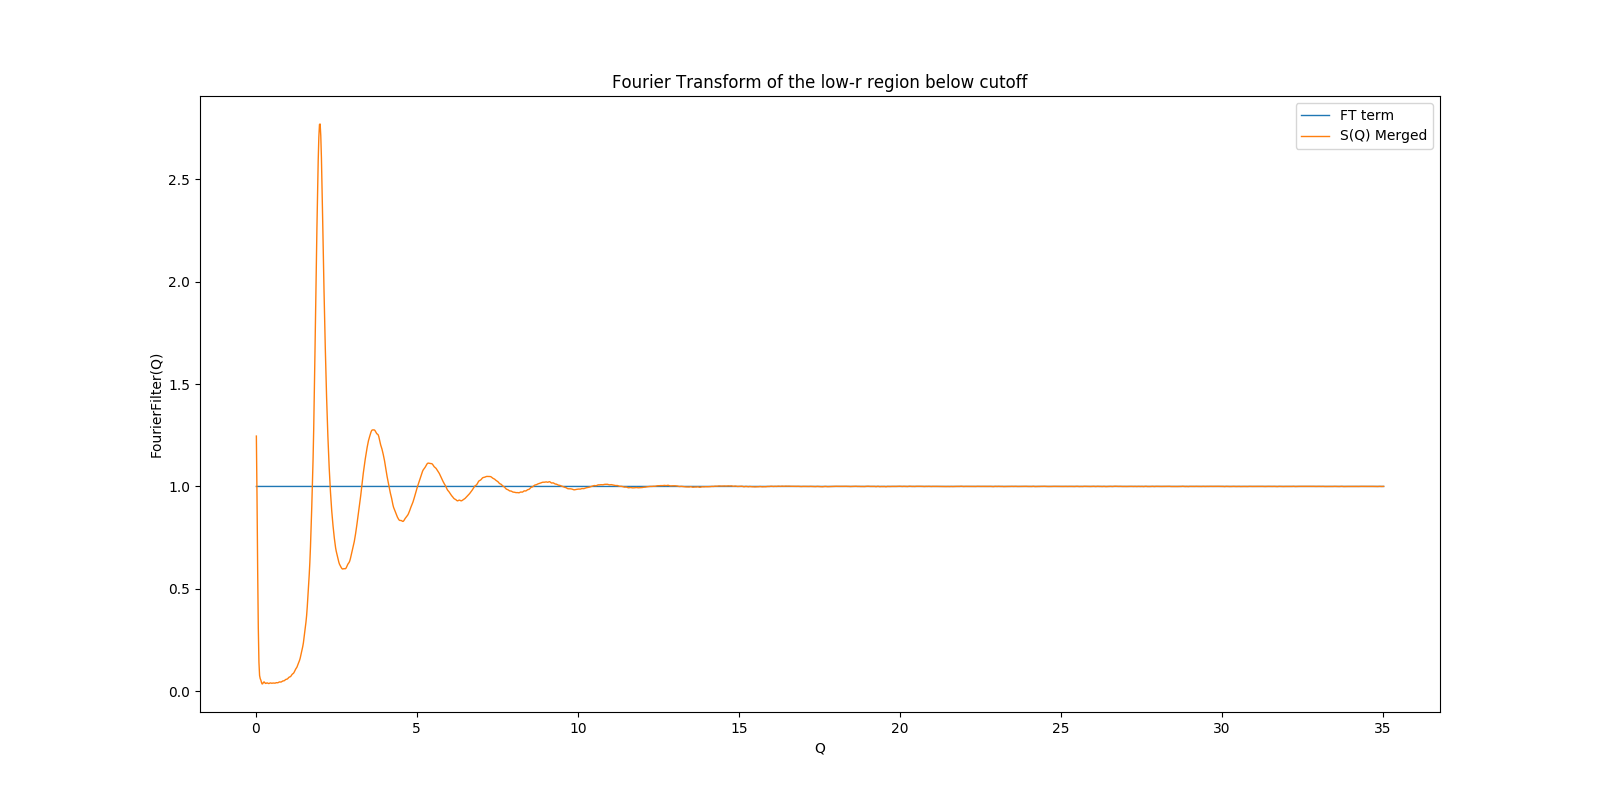

<IPython.core.display.Javascript object>


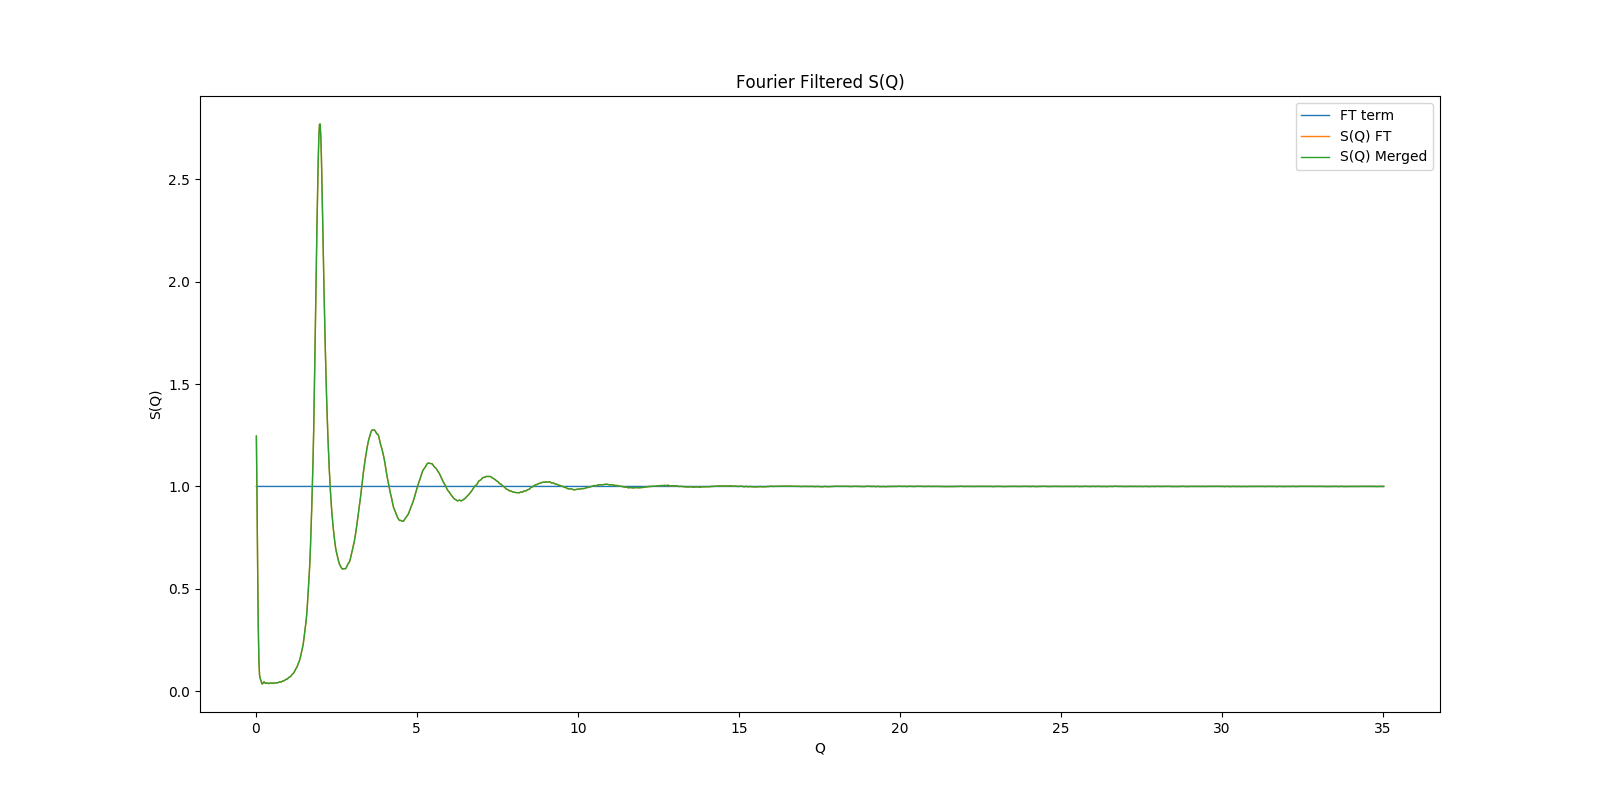

<IPython.core.display.Javascript object>


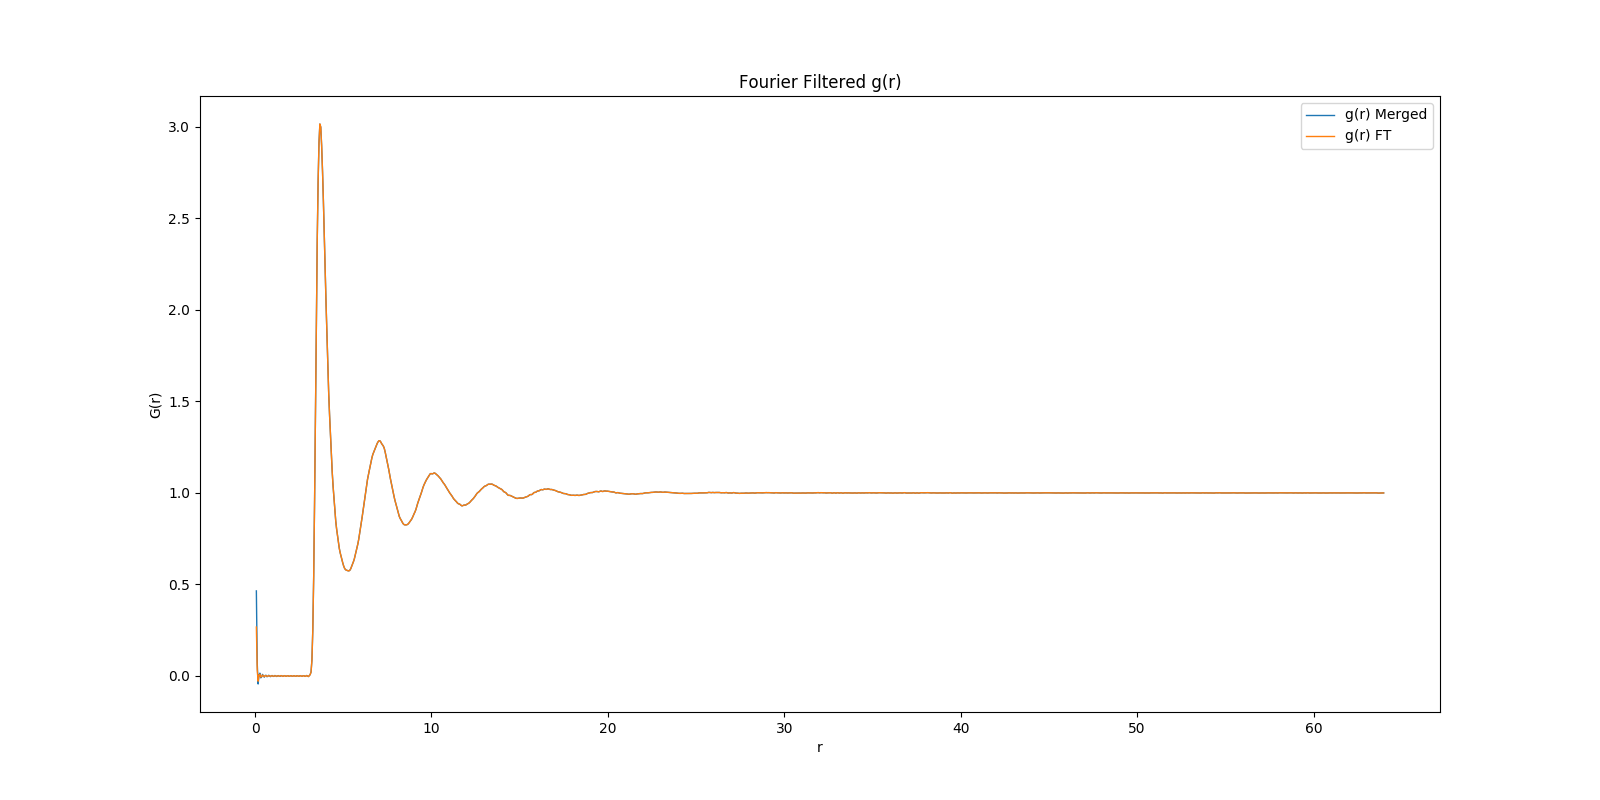

(array([2.000e-02, 4.000e-02, 6.000e-02, ..., 3.498e+01, 3.500e+01,
        3.502e+01]),
 array([1.24603239, 0.95024238, 0.59793937, ..., 1.00003463, 1.0002388 ,
        1.00020099]),
 array([ 0.075,  0.125,  0.175, ..., 63.875, 63.925, 63.975]),
 array([ 0.26732029,  0.03216991, -0.02843351, ...,  0.99977784,
         0.9996035 ,  0.9999354 ]))

In [11]:
stog.read_all_data()
stog.merge_data()
stog.transform_merged()
stog.fourier_filter()

Even though we have already processed the files, we can view the dianostics from the initial merge:

<IPython.core.display.Javascript object>


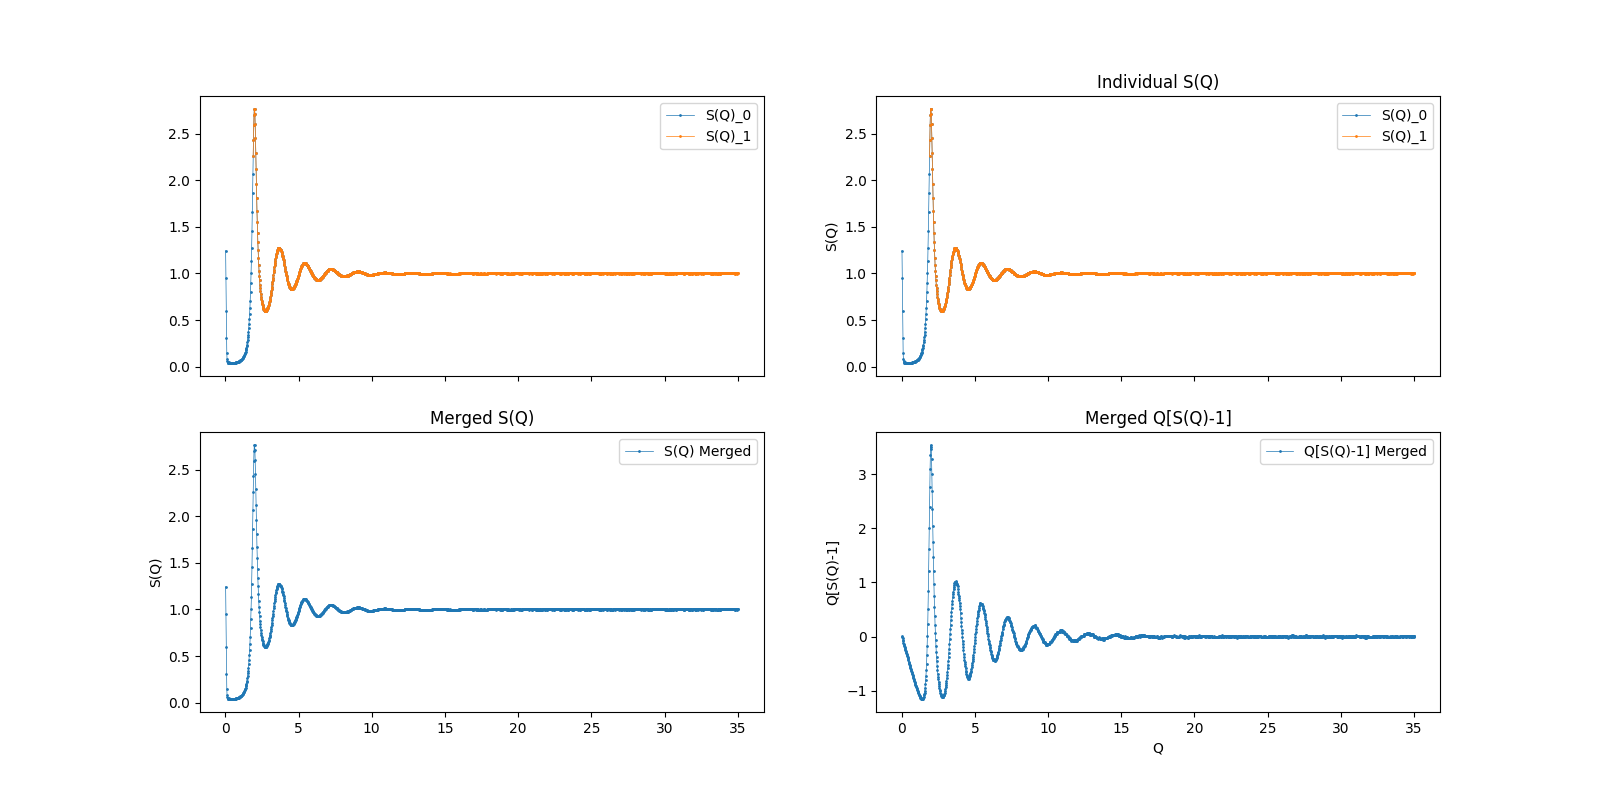

In [12]:
stog.plot_merged_sq()

We can also view the processed $S(Q)$, the filter applied, and the resulting $Q[S(Q)-1]$

<IPython.core.display.Javascript object>


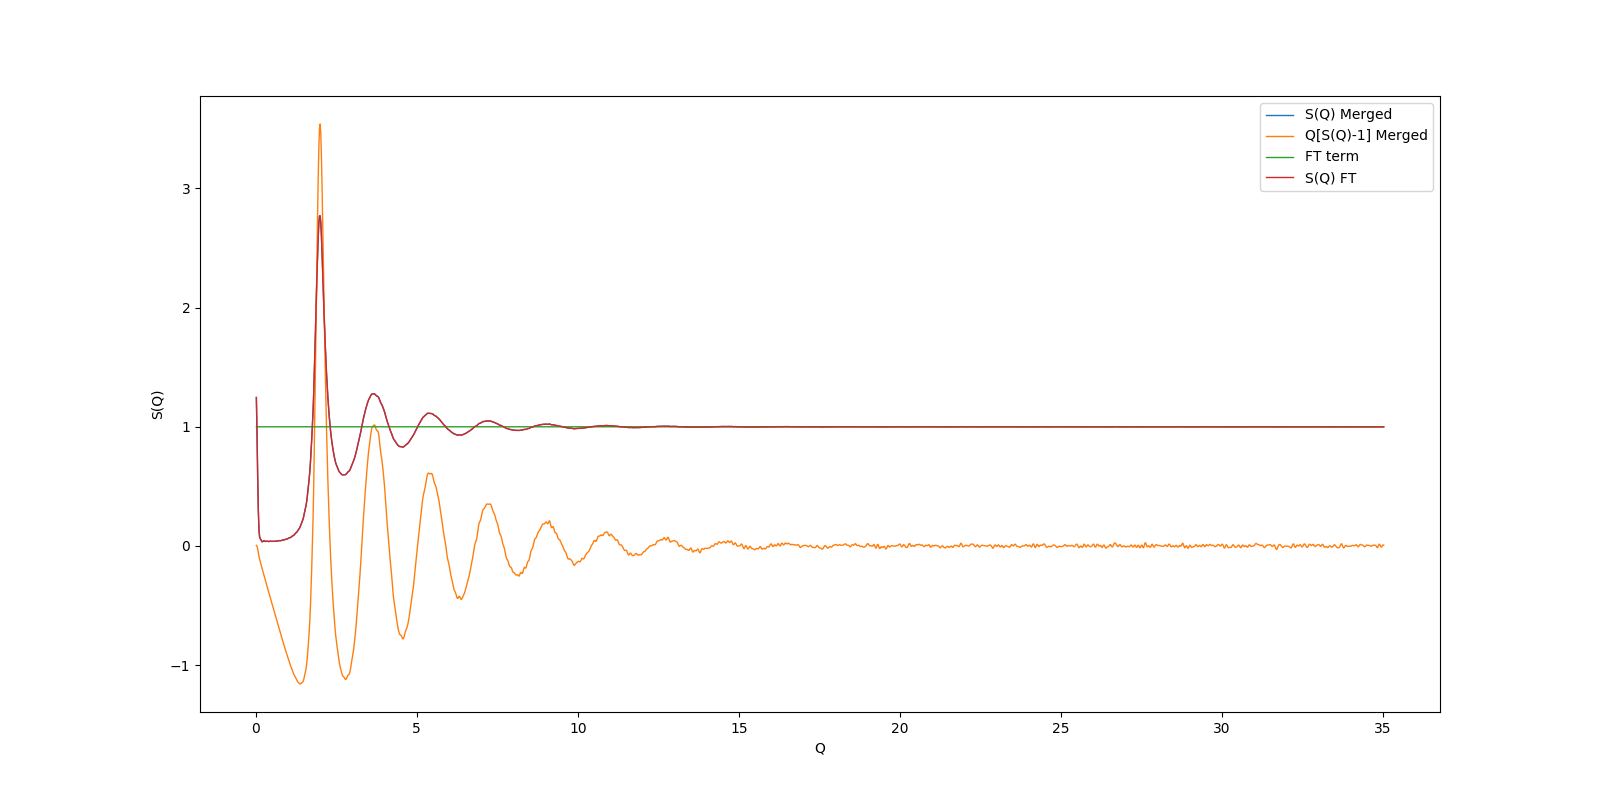

In [13]:
stog.plot_sq()

And finally, we can see the resulting real space data for each step as well:

<IPython.core.display.Javascript object>


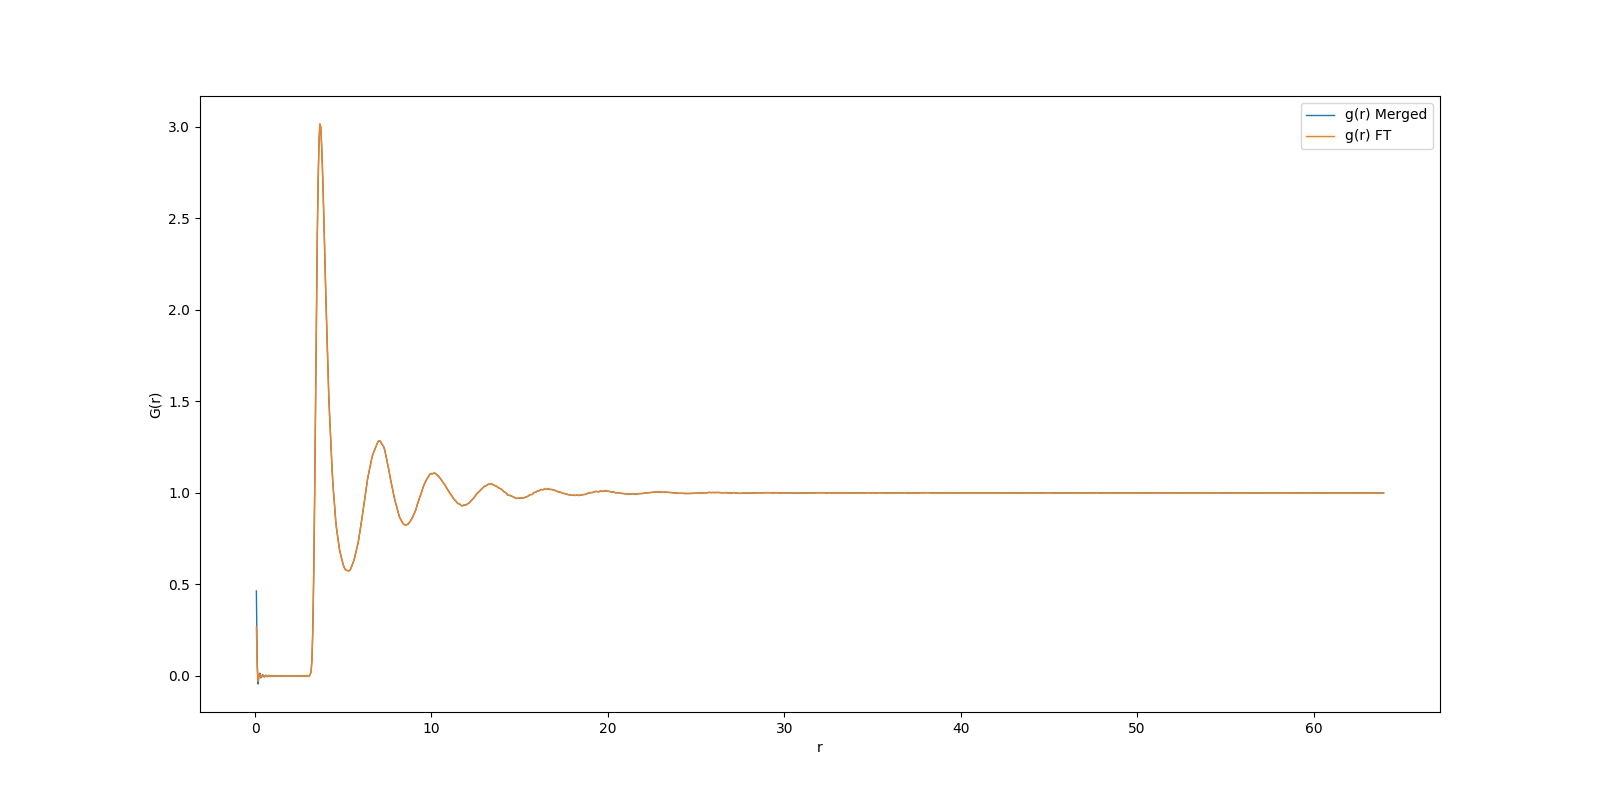

In [14]:
stog.plot_gr()